## <center>NBA Analytics Data Analysis Project<center>
### <center>Machine Learning Notebook<center>  
    
#### <center>presented by Brian Zamkotowicz for Springboard Capstone Project<center>

The intent of this notebook is to focus on building an appropriate predictive model that looks at the NBA statistics WORP, VORP, BPM_A and PER and how they relate to team wins.  By applying linear regression techniques to the data at hand I will attempt to build a model that could be useful for optimizing offseason NBA transactions in a way that translates into the maximum number of wins the next season.

In [1]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

#import other useful packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import numpy as np


# the first step is to un-pickle the data that was saved at the end of the Data Wrangling Notebook

hoops_data = pd.read_pickle('C://Users/Home Office/hoops_data.pickle')
hoops_data1 = hoops_data.dropna()
hoops_data1.head()

,Tm,Year,Age,BPM_A,WORP,VORP,PER,WORP_Chg,VORP_Chg,BPM_A_Chg,PER_Chg,ABBR,YR,W,Win_Delta
1,ATL,2012,28.666667,-1.026931,26.987068,9.8,222.3,-16.833053,-6.8,-4.798933,-1.8,ATL,2012,40,-4.0
2,ATL,2013,26.888889,-2.037678,28.595704,10.7,245.5,1.608636,0.9,-1.010747,23.2,ATL,2013,44,4.0
3,ATL,2014,25.739130,0.746189,28.556464,10.4,265.2,-0.039241,-0.3,2.783867,19.7,ATL,2014,38,-6.0
4,ATL,2015,26.631579,-1.173145,24.713699,9.1,218.3,-3.842764,-1.3,-1.919334,-46.9,ATL,2015,60,22.0
6,BOS,2012,28.421053,5.789482,45.277074,16.3,221.5,-7.023784,-3.1,2.267505,-89.9,BOS,2012,39,-17.0


In [2]:
# add a column with previous season wins 'Prev_W'

hoops_data1['Prev_W'] = hoops_data1['W'] - hoops_data1['Win_Delta']
hoops_data1.head()

C:\Conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Tm,Year,Age,BPM_A,WORP,VORP,PER,WORP_Chg,VORP_Chg,BPM_A_Chg,PER_Chg,ABBR,YR,W,Win_Delta,Prev_W
1,ATL,2012,28.666667,-1.026931,26.987068,9.8,222.3,-16.833053,-6.8,-4.798933,-1.8,ATL,2012,40,-4.0,44.0
2,ATL,2013,26.888889,-2.037678,28.595704,10.7,245.5,1.608636,0.9,-1.010747,23.2,ATL,2013,44,4.0,40.0
3,ATL,2014,25.739130,0.746189,28.556464,10.4,265.2,-0.039241,-0.3,2.783867,19.7,ATL,2014,38,-6.0,44.0
4,ATL,2015,26.631579,-1.173145,24.713699,9.1,218.3,-3.842764,-1.3,-1.919334,-46.9,ATL,2015,60,22.0,38.0
6,BOS,2012,28.421053,5.789482,45.277074,16.3,221.5,-7.023784,-3.1,2.267505,-89.9,BOS,2012,39,-17.0,56.0


Ideally, a model can be built that will predict the number of wins in a coming season based on metrics from the previous season.  That model could then be used for team construction.  A linear regression can fit the model based on past seasons' metrics.  Below is a predictive model using the changes in statistics to predict change in wins.

In [3]:
# create a regression in statsmodel for change in stats vs win_delta

m = ols('Win_Delta ~ WORP_Chg + VORP_Chg + PER_Chg + BPM_A_Chg + Prev_W +Age', hoops_data1).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:              Win_Delta   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     12.45
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           9.93e-11
Time:                        12:21:30   Log-Likelihood:                -440.70
No. Observations:                 120   AIC:                             895.4
Df Residuals:                     113   BIC:                             914.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.8932     18.460     -1.403      0.1

Text(0.5,1,'Relationship Between Predicted and Actual Win_Delta')

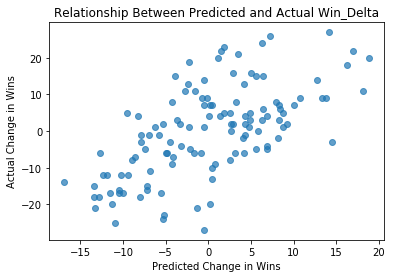

In [4]:
plt.scatter(m.fittedvalues, hoops_data1.Win_Delta, alpha = 0.7)
plt.xlabel("Predicted Change in Wins")
plt.ylabel("Actual Change in Wins")
plt.title("Relationship Between Predicted and Actual Win_Delta")

The above scatter shows a clear linear relationship between the predictions and the the actual change in wins.

The model below looks at outright wins predicted by using the outright statistics instead of changes.

In [5]:
# try the same thing using totals instead of change

m1 = ols('W ~ WORP + VORP + PER + BPM_A + Age + Prev_W', hoops_data1).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     24.03
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           3.57e-18
Time:                        12:21:30   Log-Likelihood:                -425.69
No. Observations:                 120   AIC:                             865.4
Df Residuals:                     113   BIC:                             884.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.3690     18.301      1.113      0.2

Text(0.5,1,'Relationship Between Predicted and Actual Wins')

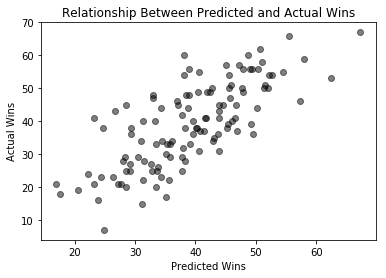

In [6]:
plt.scatter(m1.fittedvalues, hoops_data1.W, color = 'black', alpha = 0.5)
plt.xlabel("Predicted Wins")
plt.ylabel("Actual Wins")
plt.title("Relationship Between Predicted and Actual Wins")

Looking at the scatterplots above, it is clear that there is a more linear relationship in the bottom graphic.  Also the AIC score of 895 in the first model is higher than the 865 AIC indicating that the second model is a better fit.  This is not surprising as a team with "good players" (statistically speaking) will generally do well.  Predicting win changes based on changes in stats definitely has more subtlety to it.

In [7]:
from sklearn.linear_model import LinearRegression
hoops_data1= hoops_data1.drop(['Tm', 'Year', 'ABBR'], axis = 1)
X = hoops_data1.drop(['Win_Delta', 'W', 'YR'], axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:

# Use all predictors to fit linear regression model
lm.fit(X, hoops_data1.Win_Delta)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Listed below is a brief examination of the coefficients of each metric on Win Delta.

In [9]:

print('Estimated intercept coefficient: {}'.format(lm.intercept_))
print('Number of coefficients: {}'.format(len(lm.coef_)))
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

Estimated intercept coefficient: 28.386914964032748
Number of coefficients: 10


,features,estimatedCoefficients
0,Age,0.758396
1,BPM_A,1.679529
2,WORP,-0.542544
3,VORP,1.678068
4,PER,-0.021308
5,WORP_Chg,0.221574
6,VORP_Chg,0.081074
7,BPM_A_Chg,-0.844354
8,PER_Chg,0.008592
9,Prev_W,-1.131702


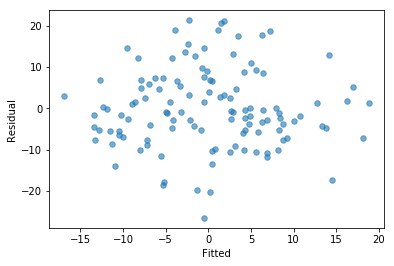

In [10]:
#Fitted vs Residuals plot
x=m.fittedvalues
y=m.resid
plt.ylabel('Residual')
plt.xlabel('Fitted')
plt.scatter(x,y,s=30, alpha = 0.6)

A fitted vs residuals diagram shows a fairly random looking distribution around zero,  there do not seem to be any troubling areas of concentration.

Text(0.5,1,'Quantile Plot')

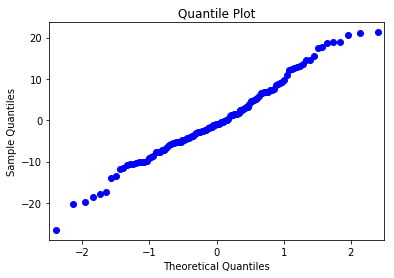

In [11]:
fig = sm.qqplot(y)
plt.title ("Quantile Plot")

The quantile plot also does not show any major areas of concern.  Next leverage and influence will be examined.

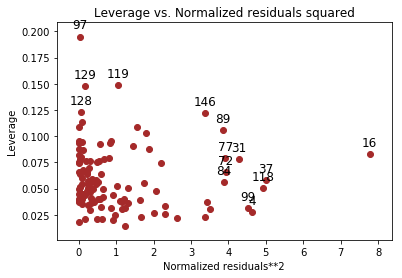

In [12]:
#from statsmodels.graphics.regressionplots import *
import statsmodels.api as sm
fig = sm.graphics.plot_leverage_resid2(m, color = 'brown')

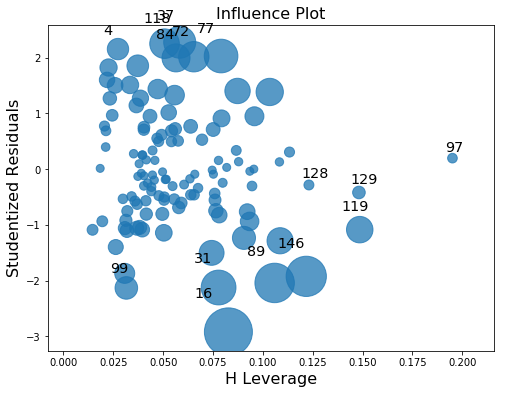

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.influence_plot(m, ax=ax)

In [14]:
hoops_data1.ix[[16, 97]]

C:\Conda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Age,BPM_A,WORP,VORP,PER,WORP_Chg,VORP_Chg,BPM_A_Chg,PER_Chg,YR,W,Win_Delta,Prev_W
16,26.263158,-8.113821,2.480603,0.8,223.4,-21.155414,-8.2,-7.596341,-79.3,2012,7,-27.0,34.0
97,31.210526,3.862652,47.457612,17.5,251.2,8.128390,2.9,1.132190,-92.5,2013,54,18.0,36.0


I looked at records 16 and 97 which appear to be possible outliers.  16 is an underachieving 2012 Charlotte team that won 7 games.  The 2013 Knicks are record  number 97. They outperformed expectations and seem to be a high leverage point.  Examining these teams I realized that there was an error in the handling of the data.  The 2012 NBA season was shortened by a labor dispute that led to a lockout.  The season was shortened to 66 games instead of 82.  This would account for a Charlottle team winning less games than expected (they also played less games than expected), and a Knicks team that won more games than expected (they had 16 extra opportunities to win games).

This obviously presents an issue with all data from 2012 and 2013 seasons.  Teams in 2012 will have lower win totals even if they won the same percentage of games and 2013 teams will have positive win deltas even if they won the same percentage.  For example a team that wone half of their games in both 2012 and 2013 would have a win delta of +8.  

The solution I have chosen for this is to normalize the 2012 season as if it were an 82 game season.  Since there are 1.24 times as many games in a regular season as there were in the 2012 season I have built a column of adjusted wins where the records from 2012 have been multiplied by 1.24.  Essentially all seasons will be normalized to 82 games.

In [15]:
#add an adjusted wins column

hoops_data['Adj_Wins'] = hoops_data['W']
hoops_data.head()

,Tm,Year,Age,BPM_A,WORP,VORP,PER,WORP_Chg,VORP_Chg,BPM_A_Chg,PER_Chg,ABBR,YR,W,Win_Delta,Adj_Wins
0,ATL,2011,27.050000,3.772002,43.820121,16.6,224.1,44.886630,16.9,4.484426,213.1,ATL,2011,44,NaN,44
1,ATL,2012,28.666667,-1.026931,26.987068,9.8,222.3,-16.833053,-6.8,-4.798933,-1.8,ATL,2012,40,-4.0,40
2,ATL,2013,26.888889,-2.037678,28.595704,10.7,245.5,1.608636,0.9,-1.010747,23.2,ATL,2013,44,4.0,44
3,ATL,2014,25.739130,0.746189,28.556464,10.4,265.2,-0.039241,-0.3,2.783867,19.7,ATL,2014,38,-6.0,38
4,ATL,2015,26.631579,-1.173145,24.713699,9.1,218.3,-3.842764,-1.3,-1.919334,-46.9,ATL,2015,60,22.0,60


In [16]:
# multiply only the 2012 records by 1.24 to normalize as if it were an 82 game season

hoops_data['Adj_Wins'] = np.where(hoops_data['Year']== 2012, (1.24 * hoops_data['W']), hoops_data['W'])
hoops_data.head()

,Tm,Year,Age,BPM_A,WORP,VORP,PER,WORP_Chg,VORP_Chg,BPM_A_Chg,PER_Chg,ABBR,YR,W,Win_Delta,Adj_Wins
0,ATL,2011,27.050000,3.772002,43.820121,16.6,224.1,44.886630,16.9,4.484426,213.1,ATL,2011,44,NaN,44.0
1,ATL,2012,28.666667,-1.026931,26.987068,9.8,222.3,-16.833053,-6.8,-4.798933,-1.8,ATL,2012,40,-4.0,49.6
2,ATL,2013,26.888889,-2.037678,28.595704,10.7,245.5,1.608636,0.9,-1.010747,23.2,ATL,2013,44,4.0,44.0
3,ATL,2014,25.739130,0.746189,28.556464,10.4,265.2,-0.039241,-0.3,2.783867,19.7,ATL,2014,38,-6.0,38.0
4,ATL,2015,26.631579,-1.173145,24.713699,9.1,218.3,-3.842764,-1.3,-1.919334,-46.9,ATL,2015,60,22.0,60.0


In [17]:
# round so that teams have whole numbers of wins.
hoops_data['Adj_Wins'] = hoops_data['Adj_Wins'].round()
hoops_data.head()

,Tm,Year,Age,BPM_A,WORP,VORP,PER,WORP_Chg,VORP_Chg,BPM_A_Chg,PER_Chg,ABBR,YR,W,Win_Delta,Adj_Wins
0,ATL,2011,27.050000,3.772002,43.820121,16.6,224.1,44.886630,16.9,4.484426,213.1,ATL,2011,44,NaN,44.0
1,ATL,2012,28.666667,-1.026931,26.987068,9.8,222.3,-16.833053,-6.8,-4.798933,-1.8,ATL,2012,40,-4.0,50.0
2,ATL,2013,26.888889,-2.037678,28.595704,10.7,245.5,1.608636,0.9,-1.010747,23.2,ATL,2013,44,4.0,44.0
3,ATL,2014,25.739130,0.746189,28.556464,10.4,265.2,-0.039241,-0.3,2.783867,19.7,ATL,2014,38,-6.0,38.0
4,ATL,2015,26.631579,-1.173145,24.713699,9.1,218.3,-3.842764,-1.3,-1.919334,-46.9,ATL,2015,60,22.0,60.0


In [18]:
# import the formula built in the data wrangling notebook for stat differentials

def get_stat_diff(stat, df, sort1, sort2, row):
    stat_diff = np.nan
    prev_year_stat = list(df[(df[sort1]==row[sort1]) & (df[sort2] == row[sort2]-1)][stat].values)
    if prev_year_stat:
        stat_diff = row[stat] - prev_year_stat[0]
    return stat_diff

In [19]:
# change Win Delta stat to look at adjusted wins instead of actual wins

hoops_data['Win_Delta'] = hoops_data.apply(lambda row: get_stat_diff('Adj_Wins', hoops_data, 'ABBR', 'YR', row), axis=1)
hoops_data.head(5)

,Tm,Year,Age,BPM_A,WORP,VORP,PER,WORP_Chg,VORP_Chg,BPM_A_Chg,PER_Chg,ABBR,YR,W,Win_Delta,Adj_Wins
0,ATL,2011,27.050000,3.772002,43.820121,16.6,224.1,44.886630,16.9,4.484426,213.1,ATL,2011,44,NaN,44.0
1,ATL,2012,28.666667,-1.026931,26.987068,9.8,222.3,-16.833053,-6.8,-4.798933,-1.8,ATL,2012,40,6.0,50.0
2,ATL,2013,26.888889,-2.037678,28.595704,10.7,245.5,1.608636,0.9,-1.010747,23.2,ATL,2013,44,-6.0,44.0
3,ATL,2014,25.739130,0.746189,28.556464,10.4,265.2,-0.039241,-0.3,2.783867,19.7,ATL,2014,38,-6.0,38.0
4,ATL,2015,26.631579,-1.173145,24.713699,9.1,218.3,-3.842764,-1.3,-1.919334,-46.9,ATL,2015,60,22.0,60.0


Win Delta is now measuring the difference between normalized 2012 wins (instead of actual) and 2013 wins.  This should give a more useful picture of how the advanced metrics may be affecting win totals.

In [20]:
# drop the unusable first year of records

hoops2 = hoops_data.dropna()
hoops2.head()

,Tm,Year,Age,BPM_A,WORP,VORP,PER,WORP_Chg,VORP_Chg,BPM_A_Chg,PER_Chg,ABBR,YR,W,Win_Delta,Adj_Wins
1,ATL,2012,28.666667,-1.026931,26.987068,9.8,222.3,-16.833053,-6.8,-4.798933,-1.8,ATL,2012,40,6.0,50.0
2,ATL,2013,26.888889,-2.037678,28.595704,10.7,245.5,1.608636,0.9,-1.010747,23.2,ATL,2013,44,-6.0,44.0
3,ATL,2014,25.739130,0.746189,28.556464,10.4,265.2,-0.039241,-0.3,2.783867,19.7,ATL,2014,38,-6.0,38.0
4,ATL,2015,26.631579,-1.173145,24.713699,9.1,218.3,-3.842764,-1.3,-1.919334,-46.9,ATL,2015,60,22.0,60.0
6,BOS,2012,28.421053,5.789482,45.277074,16.3,221.5,-7.023784,-3.1,2.267505,-89.9,BOS,2012,39,-8.0,48.0


In [21]:
# rerun Pearson correlation coefficients

WORP_Pearson =(scipy.stats.pearsonr(hoops2['WORP_Chg'], hoops2['Win_Delta']))
VORP_Pearson = (scipy.stats.pearsonr(hoops2['VORP_Chg'], hoops2['Win_Delta']))
BPM_A_Pearson =(scipy.stats.pearsonr(hoops2['BPM_A_Chg'], hoops2['Win_Delta']))
PER_Pearson = (scipy.stats.pearsonr(hoops2['PER_Chg'], hoops2['Win_Delta']))

print("WORP_Pearson = ", WORP_Pearson)
print("VORP_Pearson = ", VORP_Pearson)
print("BPM_A_Pearson = ", BPM_A_Pearson)
print("PER_Pearson = ", PER_Pearson)

WORP_Pearson =  (0.3529603458340423, 7.683711693966215e-05)
VORP_Pearson =  (0.34435446430760813, 0.00011753872300664799)
BPM_A_Pearson =  (0.3520359923366529, 8.047405540284421e-05)
PER_Pearson =  (-0.151181876661286, 0.09929760987965655)


A quick glance at the Pearson correlation coefficients for our metrics of change in WORP, VORP, and BPM_A show slightly more correlation to Win Delta now that 2012 has been normalized.

In [22]:
# the Prev_W column will now take into account normalized 2012 wins as well

hoops2['Prev_W'] = hoops2['Adj_Wins'] - hoops2['Win_Delta']
hoops2.head()

C:\Conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Tm,Year,Age,BPM_A,WORP,VORP,PER,WORP_Chg,VORP_Chg,BPM_A_Chg,PER_Chg,ABBR,YR,W,Win_Delta,Adj_Wins,Prev_W
1,ATL,2012,28.666667,-1.026931,26.987068,9.8,222.3,-16.833053,-6.8,-4.798933,-1.8,ATL,2012,40,6.0,50.0,44.0
2,ATL,2013,26.888889,-2.037678,28.595704,10.7,245.5,1.608636,0.9,-1.010747,23.2,ATL,2013,44,-6.0,44.0,50.0
3,ATL,2014,25.739130,0.746189,28.556464,10.4,265.2,-0.039241,-0.3,2.783867,19.7,ATL,2014,38,-6.0,38.0,44.0
4,ATL,2015,26.631579,-1.173145,24.713699,9.1,218.3,-3.842764,-1.3,-1.919334,-46.9,ATL,2015,60,22.0,60.0,38.0
6,BOS,2012,28.421053,5.789482,45.277074,16.3,221.5,-7.023784,-3.1,2.267505,-89.9,BOS,2012,39,-8.0,48.0,56.0


Below are the models for both wins vs outright statistics and win delta vs change in statistics after the normalization of the data.

In [23]:
# create a new regression in statsmodel for stats vs wins

m2 = ols('W ~ WORP + VORP + PER + BPM_A + Age + Prev_W', hoops2).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     23.80
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           4.81e-18
Time:                        12:21:35   Log-Likelihood:                -426.02
No. Observations:                 120   AIC:                             866.0
Df Residuals:                     113   BIC:                             885.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.1827     18.344      1.155      0.2

In [24]:
# create a new regression in statsmodel for change in stats vs win_delta

reg = ols('Win_Delta ~ WORP_Chg + VORP_Chg + BPM_A_Chg + Prev_W +Age + PER_Chg', hoops2).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:              Win_Delta   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     11.93
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           2.42e-10
Time:                        12:21:35   Log-Likelihood:                -429.92
No. Observations:                 120   AIC:                             873.8
Df Residuals:                     113   BIC:                             893.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.2188     16.965     -1.310      0.1

The model that looks at Win Delta has improved significantly with the normalization of 2012 game numbers.  The model that looks at outright wins is actually slightly worse (in terms of AIC) but still a better fit than the model examining changes.  The model that looks at wins as opposed to Win Delta also has a larger r-squared number.

Throughout the exploration of the data it has appeared that PER is not a useful indicator for predicting wins.  I will try the same regression without PER to see how it reacts.


In [25]:
reg1 = ols('Win_Delta ~  WORP_Chg + BPM_A_Chg + Age + Prev_W', hoops2).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:              Win_Delta   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     16.64
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           8.67e-11
Time:                        12:21:35   Log-Likelihood:                -431.96
No. Observations:                 120   AIC:                             873.9
Df Residuals:                     115   BIC:                             887.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.1171     17.028     -1.475      0.1

Some trial and error showed this version of the Win_Delta model to be the best in terms of AIC.  A clear relationship between the prediction and the actual win deltas can be seen in the scatterplot below.

Text(0.5,1,'Relationship Between Predicted and Actual Win_Delta')

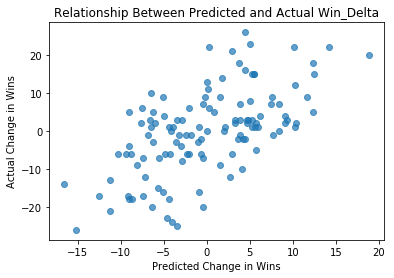

In [26]:
plt.scatter(reg1.fittedvalues, hoops2.Win_Delta, alpha = 0.7)
plt.xlabel("Predicted Change in Wins")
plt.ylabel("Actual Change in Wins")
plt.title("Relationship Between Predicted and Actual Win_Delta")

In [27]:
# try the same thing using totals instead of change

m3 = ols('W ~  WORP +BPM_A + Prev_W', hoops2).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     47.10
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           5.53e-20
Time:                        12:21:35   Log-Likelihood:                -427.24
No. Observations:                 120   AIC:                             862.5
Df Residuals:                     116   BIC:                             873.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.2064      6.931      4.358      0.0

This version of the model that predicts wins had the lowest AIC.  The scatter below shows a relatively tight grouping along the regression line.

Text(0.5,1,'Relationship Between Predicted and Actual Wins')

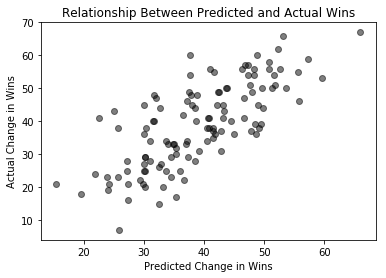

In [28]:
plt.scatter(m3.fittedvalues, hoops2.W, color = 'black', alpha = 0.5)
plt.xlabel("Predicted Change in Wins")
plt.ylabel("Actual Change in Wins")
plt.title("Relationship Between Predicted and Actual Wins")

The model that looks at change in metrics vs Win Delta still seems to fit better than the Wins vs outright metrics (higher AIC score) but looking at the scatter, the second model does seem to have improved with the normalization of 2012.

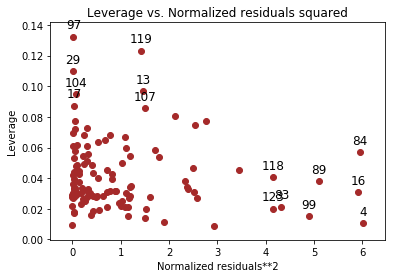

In [29]:
#from statsmodels.graphics.regressionplots import *
import statsmodels.api as sm
fig = sm.graphics.plot_leverage_resid2(reg1, color = 'brown')

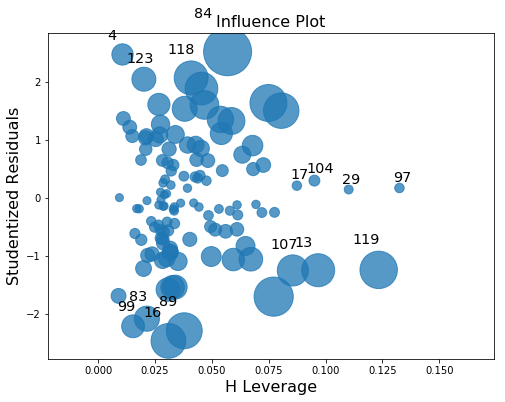

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.influence_plot(reg1, ax=ax)

Above, we can see that by normalizing the 2012 number of wins to account for the short season we have greatly reduced the number of high leverage points and potential outliers.

In [31]:
hoops2.head()

,Tm,Year,Age,BPM_A,WORP,VORP,PER,WORP_Chg,VORP_Chg,BPM_A_Chg,PER_Chg,ABBR,YR,W,Win_Delta,Adj_Wins,Prev_W
1,ATL,2012,28.666667,-1.026931,26.987068,9.8,222.3,-16.833053,-6.8,-4.798933,-1.8,ATL,2012,40,6.0,50.0,44.0
2,ATL,2013,26.888889,-2.037678,28.595704,10.7,245.5,1.608636,0.9,-1.010747,23.2,ATL,2013,44,-6.0,44.0,50.0
3,ATL,2014,25.739130,0.746189,28.556464,10.4,265.2,-0.039241,-0.3,2.783867,19.7,ATL,2014,38,-6.0,38.0,44.0
4,ATL,2015,26.631579,-1.173145,24.713699,9.1,218.3,-3.842764,-1.3,-1.919334,-46.9,ATL,2015,60,22.0,60.0,38.0
6,BOS,2012,28.421053,5.789482,45.277074,16.3,221.5,-7.023784,-3.1,2.267505,-89.9,BOS,2012,39,-8.0,48.0,56.0


In [32]:
# build a set of data frames that can be used for testing

train = hoops2[hoops2['Year'] < 2015]

train = train[['WORP', 'VORP' , 'PER' , 'BPM_A' , 'Age' , 'Prev_W', 'Adj_Wins']]
test = hoops2[hoops2['Year'] == 2015]
test = test[['WORP', 'VORP' , 'PER' , 'BPM_A' , 'Age' , 'Prev_W', 'Adj_Wins']]
test.head()

,WORP,VORP,PER,BPM_A,Age,Prev_W,Adj_Wins
4,24.713699,9.1,218.3,-1.173145,26.631579,38.0,60.0
9,22.181314,8.4,345.1,-7.551092,26.080000,25.0,40.0
14,12.464130,4.7,250.9,-6.440879,27.142857,44.0,38.0
19,19.435601,7.4,241.2,-4.230818,26.333333,43.0,33.0
24,35.744942,13.0,182.0,2.308918,28.400000,48.0,50.0


With the data now split, it can be put through different models to test their effectiveness.

In [33]:
from sklearn import datasets, linear_model, svm, tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

# break up the data frames into x and y sets

wins_X_train = train.drop(columns = ['Adj_Wins'])
wins_X_test = test.drop(columns = ['Adj_Wins'])
wins_y_train =train['Adj_Wins']
wins_y_test = test['Adj_Wins']

# scale the data
scaler = preprocessing.StandardScaler().fit(wins_X_train)
wins_X_train = scaler.transform(wins_X_train) 
wins_X_test = scaler.transform(wins_X_test) 

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(wins_X_train, wins_y_train)

# Make predictions using the testing set
wins_y_pred = regr.predict(wins_X_test)

a1= wins_y_test
b1 = wins_y_pred

# The coefficients
print('Coefficients: \n', regr.coef_)

r1 = wins_y_test - wins_y_pred

print('Upper and Lower Bounds for 90% Density:  \n', np.percentile(r1, [5,95]))

Coefficients: 
 [-4.43466252  9.5284219  -1.74121477  5.39757364  0.73572278 -0.60535854]
Upper and Lower Bounds for 90% Density:  
 [-11.20011786  18.51012112]


In [34]:
# Create linear regression object
regr = linear_model.Lasso(alpha = .44)

# Train the model using the training sets
regr.fit(wins_X_train, wins_y_train)

# Make predictions using the testing set
wins_y_pred = regr.predict(wins_X_test)

a2= wins_y_test
b2 = wins_y_pred

# The coefficients
print('Coefficients: \n', regr.coef_)


r2 = wins_y_test - wins_y_pred

print('Upper and Lower Bounds for 90% Density:  \n', np.percentile(r2, [5,95]))

Coefficients: 
 [ 0.          3.75291472 -1.10178457  5.88900433  0.46006983  0.        ]
Upper and Lower Bounds for 90% Density:  
 [-10.2060207   17.97732033]


In [35]:
# Create linear regression object
regr = linear_model.Ridge(alpha =.39)

# Train the model using the training sets
regr.fit(wins_X_train, wins_y_train)

# Make predictions using the testing set
wins_y_pred = regr.predict(wins_X_test)

a3= wins_y_test
b3 = wins_y_pred

# The coefficients
print('Coefficients: \n', regr.coef_)

r3 = wins_y_test - wins_y_pred

print('Upper and Lower Bounds for 90% Density:  \n', np.percentile(r3, [5,95]))

Coefficients: 
 [ 1.48008382  3.77853039 -1.76193725  5.04454294  0.68464721 -0.35247972]
Upper and Lower Bounds for 90% Density:  
 [-11.07702534  18.46907355]


In [36]:
# Create linear regression object
regr = svm.LinearSVR()

# Train the model using the training sets
regr.fit(wins_X_train, wins_y_train)

# Make predictions using the testing set
wins_y_pred = regr.predict(wins_X_test)

a4= wins_y_test
b4 = wins_y_pred

# The coefficients
print('Coefficients: \n', regr.coef_)

r4 = wins_y_test - wins_y_pred

print('Upper and Lower Bounds for 90% Density:  \n', np.percentile(r4, [5,95]))

Coefficients: 
 [ 2.86561418  3.132102   -0.95020797  3.0402176   0.97268968  0.79767971]
Upper and Lower Bounds for 90% Density:  
 [-6.91869194 21.04946933]


In [37]:
# Create linear regression object
regr = linear_model.RidgeCV(alphas = (0.1, 0.3, .5, 1, 2, 5, 10))

# Train the model using the training sets
regr.fit(wins_X_train, wins_y_train)

# Make predictions using the testing set
wins_y_pred = regr.predict(wins_X_test)

a5= wins_y_test
b5 = wins_y_pred

# The coefficients
print('Coefficients: \n', regr.coef_)

r5 = wins_y_test - wins_y_pred

print('Upper and Lower Bounds for 90% Density:  \n', np.percentile(r5, [5,95]))

Coefficients: 
 [ 2.83568841  2.87420391 -1.65203126  3.6017439   0.75569442  0.38156254]
Upper and Lower Bounds for 90% Density:  
 [-9.67732077 18.17718069]


In [38]:
# Create linear regression object
regr = linear_model.LassoCV()

# Train the model using the training sets
regr.fit(wins_X_train, wins_y_train)

# Make predictions using the testing set
wins_y_pred = regr.predict(wins_X_test)

a6= wins_y_test
b6 = wins_y_pred

# The coefficients
print('Coefficients: \n', regr.coef_)

r6 = wins_y_test - wins_y_pred

print('Upper and Lower Bounds for 90% Density:  \n', np.percentile(r6, [5,95]))

Coefficients: 
 [ 0.          4.73624354 -1.56336138  5.1987636   0.58501147 -0.        ]
Upper and Lower Bounds for 90% Density:  
 [-10.44452362  18.32224162]


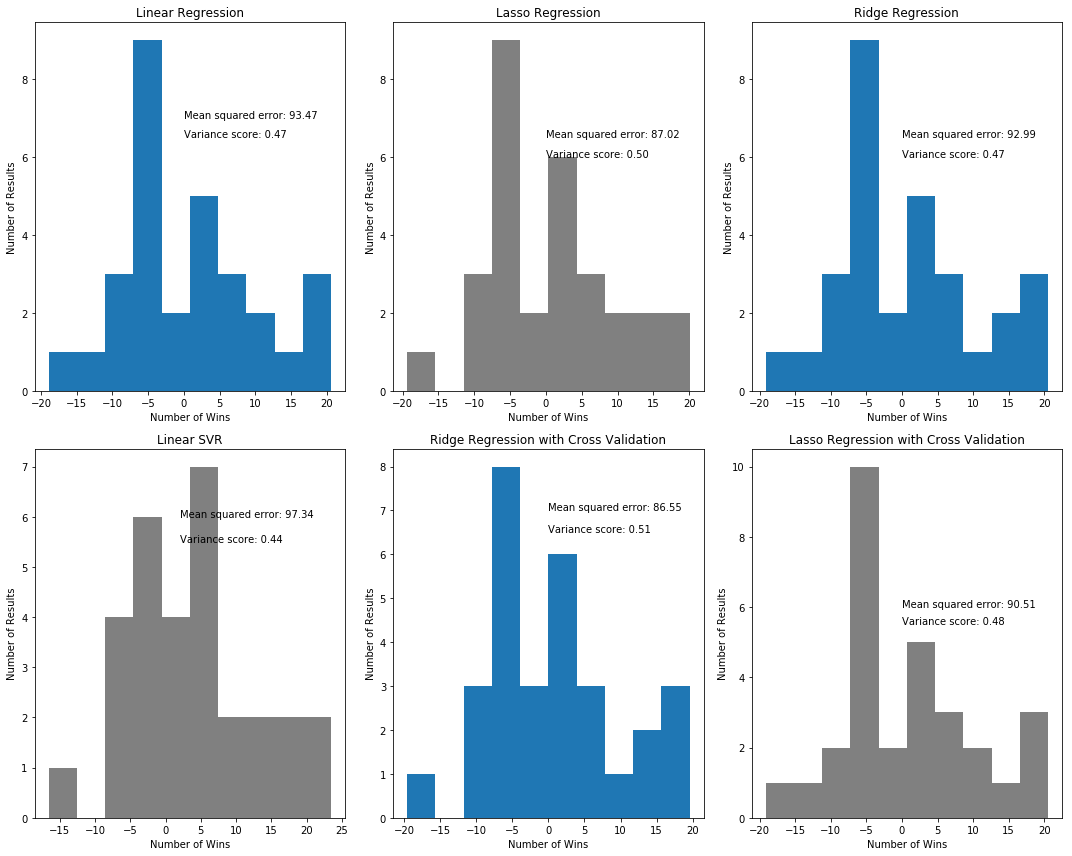

In [39]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(15)

ax1 = fig.add_subplot (2,3,1)
plt.hist(r1)
plt.xlabel("Number of Wins")
plt.ylabel("Number of Results")
plt.title('Linear Regression')
plt.text(0, 7, "Mean squared error: %.2f"
      % mean_squared_error(a1,b1))
plt.text(0, 6.5, 'Variance score: %.2f' % r2_score(a1,b1))

ax2 = fig.add_subplot (2,3,2)
plt.hist(r2, color = 'grey')
plt.xlabel("Number of Wins")
plt.ylabel("Number of Results")
plt.title('Lasso Regression')
plt.text(0, 6.5, "Mean squared error: %.2f"
      % mean_squared_error(a2,b2))
plt.text(0, 6, 'Variance score: %.2f' % r2_score(a2,b2))

ax3 = fig.add_subplot (2,3,3)
plt.hist(r3)
plt.xlabel("Number of Wins")
plt.ylabel("Number of Results")
plt.title('Ridge Regression')
plt.text(0, 6.5, "Mean squared error: %.2f"
      % mean_squared_error(a3,b3))
plt.text(0, 6, 'Variance score: %.2f' % r2_score(a3,b3))

ax4 = fig.add_subplot (2,3,4)
plt.hist(r4, color = 'grey')
plt.xlabel("Number of Wins")
plt.ylabel("Number of Results")
plt.title('Linear SVR')
plt.text(2, 6, "Mean squared error: %.2f"
      % mean_squared_error(a4,b4))
plt.text(2, 5.5, 'Variance score: %.2f' % r2_score(a4,b4))

ax5 = fig.add_subplot (2,3,5)
plt.hist(r5)
plt.xlabel("Number of Wins")
plt.ylabel("Number of Results")
plt.title('Ridge Regression with Cross Validation')
plt.text(0, 7, "Mean squared error: %.2f"
      % mean_squared_error(a5,b5))
plt.text(0, 6.5, 'Variance score: %.2f' % r2_score(a5,b5))

ax6 = fig.add_subplot (2,3,6)
plt.hist(r6, color = 'grey')
plt.text(0, 6, "Mean squared error: %.2f"
      % mean_squared_error(a6,b6))
plt.text(0, 5.5, 'Variance score: %.2f' % r2_score(a6,b6))
plt.xlabel("Number of Wins")
plt.ylabel("Number of Results")
plt.title('Lasso Regression with Cross Validation')

plt.tight_layout()

The above histograms show the distribution of the residuals for each model as well as the r-squared value and the variance score. Below is a 5 fold cross validation of the r-squared of the training set.

In [40]:
#tune alpha for Wins Lasso model

from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
vals = np.linspace(0.05, 1)
param_grid = {'alpha': vals}

# Instantiate a logistic regression classifier: logreg
lasso = linear_model.Lasso()

# Instantiate the GridSearchCV object: logreg_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)

# Fit it to the data
lasso_cv.fit(wins_X_train, wins_y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(lasso_cv.best_params_)) 
print("Best score is {}".format(lasso_cv.best_score_))

Tuned Logistic Regression Parameters: {'alpha': 0.22448979591836737}
Best score is 0.5987309844148684


In [41]:
#tune alpha for Wins Ridge model

# Setup the hyperparameter grid
vals = np.linspace(0.1, 1)
param_grid = {'alpha': vals}

# Instantiate a logistic regression classifier: logreg
ridge = linear_model.Ridge()

# Instantiate the GridSearchCV object: logreg_cv
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)

# Fit it to the data
ridge_cv.fit(wins_X_train, wins_y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(ridge_cv.best_params_)) 
print("Best score is {}".format(ridge_cv.best_score_))

Tuned Logistic Regression Parameters: {'alpha': 1.0}
Best score is 0.595054514473092


In [42]:
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, wins_X_train, wins_y_train, cv= 5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.54805653 0.38312057 0.61857339 0.75344096 0.62224865]
Average 5-Fold CV Score: 0.5850880185802309


In [43]:
# build a set of data frames that can be used for testing

from sklearn.preprocessing import StandardScaler

train = hoops2[hoops2['Year'] < 2015]
train = train[['WORP_Chg', 'VORP_Chg' , 'PER_Chg' , 'BPM_A_Chg' , 'Age' , 'Prev_W', 'Win_Delta']]

test = hoops2[hoops2['Year'] == 2015]
test = test[['WORP_Chg', 'VORP_Chg' , 'PER_Chg' , 'BPM_A_Chg' , 'Age' , 'Prev_W', 'Win_Delta']]
test.head()

# break up the data frames into x and y sets

winD_X_train = train.drop(columns = ['Win_Delta'])
winD_X_test = test.drop(columns = ['Win_Delta'])
winD_y_train =train['Win_Delta']
winD_y_test = test['Win_Delta']

# Standarize features
scaler = StandardScaler()
winD_X_train = scaler.fit_transform(winD_X_train) 
winD_X_test = scaler.fit_transform(winD_X_test)

# Create linear regression object
regrD = linear_model.LinearRegression()

# Train the model using the training sets
regrD.fit(winD_X_train, winD_y_train)

# Make predictions using the testing set
winD_y_pred = regrD.predict(winD_X_test)

aD1= winD_y_test
bD1 = winD_y_pred

# The coefficients
print(' Linear Regression Coefficients: \n', regrD.coef_)
rD1 = winD_y_test - winD_y_pred
print('Upper and Lower Bounds for 90% Density:  \n', np.percentile(rD1, [5,95]))

# Create lasso regression object
regrD = linear_model.Lasso(alpha = .37)

# Train the model using the training sets
regrD.fit(winD_X_train, winD_y_train)

# Make predictions using the testing set
winD_y_pred = regrD.predict(winD_X_test)

aD2= winD_y_test
bD2 = winD_y_pred

# The coefficients
print(' Lasso Coefficients: \n', regrD.coef_)

rD2 = winD_y_test - winD_y_pred

print('Upper and Lower Bounds for 90% Density:  \n', np.percentile(rD2, [5,95]))

# Create Ridge linear regression object
regrD = linear_model.Ridge(alpha = 10)

# Train the model using the training sets
regrD.fit(winD_X_train, winD_y_train)

# Make predictions using the testing set
winD_y_pred = regrD.predict(winD_X_test)

aD3= winD_y_test
bD3 = winD_y_pred

rD3 = winD_y_test - winD_y_pred
 
# The coefficients
print(' Ridge Coefficients: \n', regrD.coef_)
print('Upper and Lower Bounds for 90% Density:  \n', np.percentile(rD3, [5,95]))

# Create linear regression object
regrD = svm.LinearSVR()

# Train the model using the training sets
regrD.fit(winD_X_train, winD_y_train)

# Make predictions using the testing set
winD_y_pred = regrD.predict(winD_X_test)

aD4= winD_y_test
bD4 = winD_y_pred

rD4 = winD_y_test - winD_y_pred

# The coefficients
print(' Linear SVM Coefficients: \n', regrD.coef_)
print('Upper and Lower Bounds for 90% Density:  \n', np.percentile(rD4, [5,95]))
# Create linear regression object
regrD = linear_model.RidgeCV()

# Train the model using the training sets
regrD.fit(winD_X_train, winD_y_train)

# Make predictions using the testing set
winD_y_pred = regrD.predict(winD_X_test)

aD5= winD_y_test
bD5 = winD_y_pred

rD5 = winD_y_test - winD_y_pred

# The coefficients
print(' Ridge Regression CV Coefficients: \n', regrD.coef_)
print('Upper and Lower Bounds for 90% Density:  \n', np.percentile(rD5, [5,95]))

# Create linear regression object
regrD = linear_model.LassoCV()

# Train the model using the training sets
regrD.fit(winD_X_train, winD_y_train)

# Make predictions using the testing set
winD_y_pred = regrD.predict(winD_X_test)

aD6= winD_y_test
bD6 = winD_y_pred

rD6 = winD_y_test - winD_y_pred

# The coefficients
print(' Lasso CV Coefficients: \n', regrD.coef_)
print(' Upper and Lower Bounds for 90% Density:  \n', np.percentile(rD6, [5,95]))

 Linear Regression Coefficients: 
 [ 20.07127222 -19.10687147  -0.3838953    3.43108277   2.51221598
  -5.68162547]
Upper and Lower Bounds for 90% Density:  
 [-16.8901179   18.03193943]
 Lasso Coefficients: 
 [ 0.63899793  0.         -0.22744077  3.43892433  1.89430187 -5.2185008 ]
Upper and Lower Bounds for 90% Density:  
 [-16.82485357  17.95218329]
 Ridge Coefficients: 
 [ 1.45052217  0.43090135 -0.77923413  2.42471384  1.86531097 -4.94265008]
Upper and Lower Bounds for 90% Density:  
 [-16.48389899  17.47435921]
 Linear SVM Coefficients: 
 [ 0.93535021 -0.57346538 -1.00945418  2.90071812  2.1550466  -4.50236098]
Upper and Lower Bounds for 90% Density:  
 [-16.17821924  17.66682112]
 Ridge Regression CV Coefficients: 
 [ 1.45052217  0.43090135 -0.77923413  2.42471384  1.86531097 -4.94265008]
Upper and Lower Bounds for 90% Density:  
 [-16.48389899  17.47435921]
 Lasso CV Coefficients: 
 [ 0.80931473  0.         -0.3728941   3.43633437  2.19011196 -5.51303178]
 Upper and Lower Bound

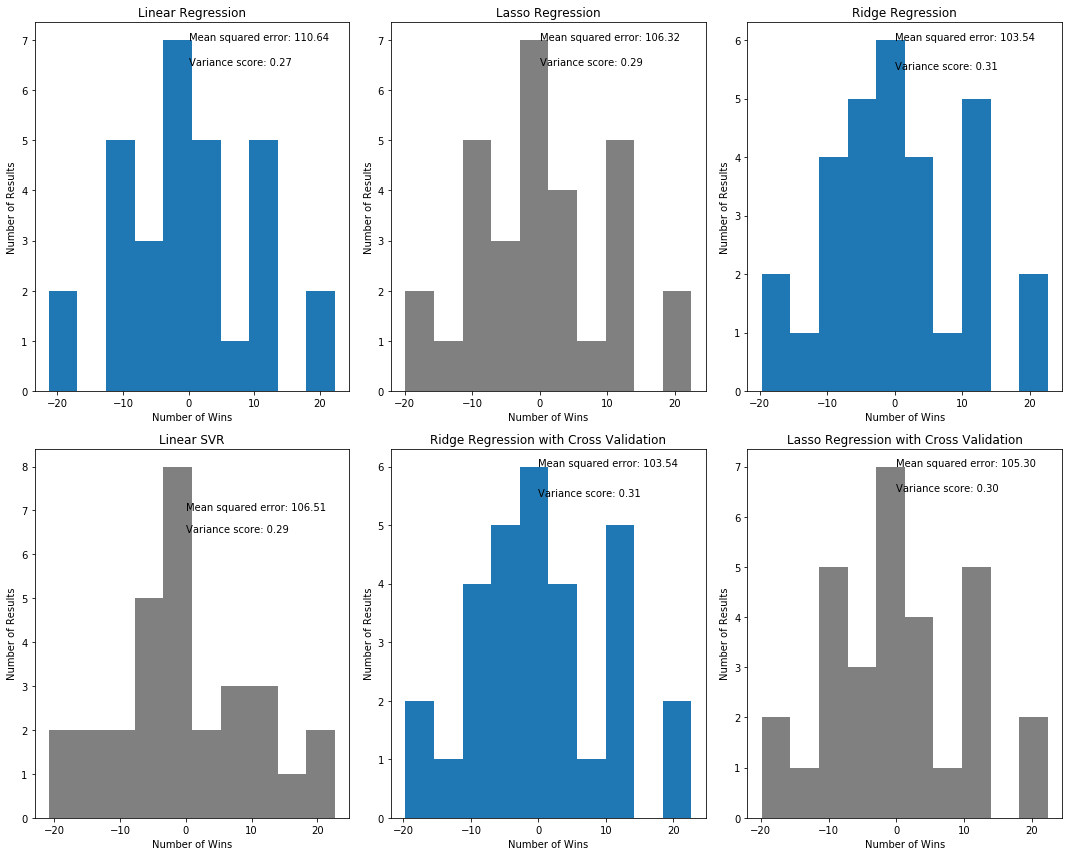

In [44]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(15)


ax1 = fig.add_subplot (2,3,1)
plt.hist(rD1)
plt.xlabel("Number of Wins")
plt.ylabel("Number of Results")
plt.title('Linear Regression')
plt.text(0, 7, "Mean squared error: %.2f"
      % mean_squared_error(aD1,bD1))
plt.text(0, 6.5, 'Variance score: %.2f' % r2_score(aD1,bD1))

ax2 = fig.add_subplot (2,3,2)
plt.hist(rD2, color = 'grey')
plt.xlabel("Number of Wins")
plt.ylabel("Number of Results")
plt.title('Lasso Regression')
plt.text(0, 7, "Mean squared error: %.2f"
      % mean_squared_error(aD2,bD2))
plt.text(0, 6.5, 'Variance score: %.2f' % r2_score(aD2,bD2))

ax3 = fig.add_subplot (2,3,3)
plt.hist(rD3)
plt.xlabel("Number of Wins")
plt.ylabel("Number of Results")
plt.title('Ridge Regression')
plt.text(0, 6, "Mean squared error: %.2f"
      % mean_squared_error(aD3,bD3))
plt.text(0, 5.5, 'Variance score: %.2f' % r2_score(aD3,bD3))

ax4 = fig.add_subplot (2,3,4)
plt.hist(rD4, color = 'grey')
plt.xlabel("Number of Wins")
plt.ylabel("Number of Results")
plt.title('Linear SVR')
plt.text(0, 7, "Mean squared error: %.2f"
      % mean_squared_error(aD4,bD4))
plt.text(0, 6.5, 'Variance score: %.2f' % r2_score(aD4,bD4))

ax5 = fig.add_subplot (2,3,5)
plt.hist(rD5)
plt.xlabel("Number of Wins")
plt.ylabel("Number of Results")
plt.title('Ridge Regression with Cross Validation')
plt.text(0, 6, "Mean squared error: %.2f"
      % mean_squared_error(aD5,bD5))
plt.text(0, 5.5, 'Variance score: %.2f' % r2_score(aD5,bD5))

ax6 = fig.add_subplot (2,3,6)
plt.hist(rD6, color = 'grey')
plt.text(0, 7, "Mean squared error: %.2f"
      % mean_squared_error(aD6,bD6))
plt.text(0, 6.5, 'Variance score: %.2f' % r2_score(aD6,bD6))
plt.xlabel("Number of Wins")
plt.ylabel("Number of Results")
plt.title('Lasso Regression with Cross Validation')

plt.tight_layout()

The alpha variables above were originally randomly selected. Using GridSearchCV below, I have calculated the alpha inputs that should generate the best (highest variance scores).

In [45]:
#tune alpha for Win Delta Lasso model

# Setup the hyperparameter grid
vals = np.linspace(0.05, 2)
param_grid = {'alpha': vals}

# Instantiate a logistic regression classifier: logreg
lasso = linear_model.Lasso()

# Instantiate the GridSearchCV object: logreg_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)

# Fit it to the data
lasso_cv.fit(winD_X_train, winD_y_train)

# Print the tuned parameters and score
print("Lasso Tuned Logistic Regression Parameters: {}".format(lasso_cv.best_params_)) 
print("Best score is {}".format(lasso_cv.best_score_))
print

#tune alpha for Win Delta Ridge model

# Setup the hyperparameter grid
vals = [0.1, 0.5, 1, 2, 10] 
param_grid = {'alpha': vals}

# Instantiate a logistic regression classifier: logreg
ridge = linear_model.Ridge()

# Instantiate the GridSearchCV object: logreg_cv
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)

# Fit it to the data
ridge_cv.fit(winD_X_train, winD_y_train)

# Print the tuned parameters and score
print("Ridge Tuned Logistic Regression Parameters: {}".format(ridge_cv.best_params_)) 
print("Best score is {}".format(ridge_cv.best_score_))

C:\Conda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso Tuned Logistic Regression Parameters: {'alpha': 0.3683673469387755}
Best score is 0.27087762247779934
Ridge Tuned Logistic Regression Parameters: {'alpha': 10}
Best score is 0.28163604604645187


Above are optimized alpha tunings for the Lasso and Ridge versions of the Win Delta model
which I plugged back into the Win Delta models.

One important takeaway from the information that is presented above is that the wins model seems to be a significantly better predictor of future performance than the model that examines win delta.  for this reason I will continue to examine the wins model, at least for the time being.

While Lasso uses L1 regularization and Ridge uses L2 regularization, a combination of the 2 can be used by ElasticNet.

Coefficients: 
 [ 2.75355532  2.91132579 -1.69506264  4.10078556  0.6815501   0.046825  ]
Upper and Lower Bounds for 90% Density:  
 [-10.40761411  18.29902961]


Text(0.5,1,'Elastic Net Regression')

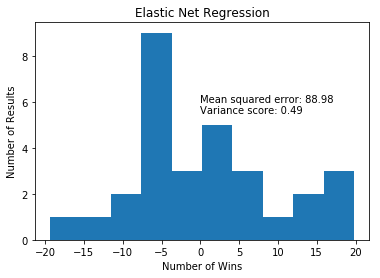

In [95]:
# build a set of data frames that can be used for testing

train = hoops2[hoops2['Year'] < 2015]

train = train[['WORP', 'VORP' , 'PER' , 'BPM_A' , 'Age' , 'Prev_W', 'Adj_Wins']]
test = hoops2[hoops2['Year'] == 2015]
test = test[['WORP', 'VORP' , 'PER' , 'BPM_A' , 'Age' , 'Prev_W', 'Adj_Wins']]
test.head()

# break up the data frames into x and y sets

wins_X_train = train.drop(columns = ['Adj_Wins'])
wins_X_test = test.drop(columns = ['Adj_Wins'])
wins_y_train =train['Adj_Wins']
wins_y_test = test['Adj_Wins']

# scale the data
scaler = preprocessing.StandardScaler().fit(wins_X_train)
wins_X_train = scaler.transform(wins_X_train) 
wins_X_test = scaler.transform(wins_X_test) 

# Create linear regression object
regr = linear_model.ElasticNet(l1_ratio = .5, alpha= .1)
# Train the model using the training sets
regr.fit(wins_X_train, wins_y_train)

# Make predictions using the testing set
wins_y_pred = regr.predict(wins_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

EN = wins_y_test - wins_y_pred

print('Upper and Lower Bounds for 90% Density:  \n', np.percentile(EN, [5,95]))

plt.hist(EN)
plt.text(0, 6, "Mean squared error: %.2f"
      % mean_squared_error(wins_y_test, wins_y_pred))
plt.text(0, 5.5, 'Variance score: %.2f' % r2_score(wins_y_test, wins_y_pred))
plt.xlabel("Number of Wins")
plt.ylabel("Number of Results")
plt.title('Elastic Net Regression')

This model can also be tuned using a grid search for both l1 ratio and alpha.

In [47]:
#tune l1 and alpha for ElasticNet model

# Setup the hyperparameter grid
l1s = (0.4, 0.5, 0.6)
alphas = (0.05, .1, .3, .5, 1, 2, 3)
param_grid = {'l1_ratio': l1s, 'alpha': alphas}

# Instantiate a logistic regression classifier: logreg
EN = linear_model.ElasticNet(max_iter=1000, tol=.001)

# Instantiate the GridSearchCV object: logreg_cv
EN_cv = GridSearchCV(EN, param_grid, cv=5)

# Fit it to the data
EN_cv.fit(wins_X_train, wins_y_train)

# Print the tuned parameters and score
print("Tuned l1 and alpha Parameters for ElasticNet: {}".format(EN_cv.best_params_)) 
print("Best score is {}".format(EN_cv.best_score_))


Tuned l1 and alpha Parameters for ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.5}
Best score is 0.5991215726863579


In [48]:
best_model = EN_cv.best_estimator_
best_model.score(wins_X_test, wins_y_test)

0.49160750530739744

In [49]:
best_model

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.001, warm_start=False)

In [50]:
from sklearn import ensemble

# build a set of data frames that can be used for testing

train = hoops2[hoops2['Year'] < 2015]

train = train[['WORP', 'VORP' , 'PER' , 'BPM_A' , 'Age' , 'Prev_W', 'Adj_Wins']]
test = hoops2[hoops2['Year'] == 2015]
test = test[['WORP', 'VORP' , 'PER' , 'BPM_A' , 'Age' , 'Prev_W', 'Adj_Wins']]
test.head()

# break up the data frames into x and y sets

wins_X_train = train.drop(columns = ['Adj_Wins'])
wins_X_test = test.drop(columns = ['Adj_Wins'])
wins_y_train =train['Adj_Wins']
wins_y_test = test['Adj_Wins']

# scale the data
scaler = preprocessing.StandardScaler().fit(wins_X_train)
wins_X_train = scaler.transform(wins_X_train) 
wins_X_test = scaler.transform(wins_X_test) 



In [51]:
#create a random grid

from pprint import pprint

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [89]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = ensemble.RandomForestRegressor(random_state = 17)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(wins_X_train, wins_y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=17, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [90]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

Upper and Lower Bounds for 90% Density:  
 [-11.288295    15.97592181]
Feature Importance:  
 [0.25779398 0.23559968 0.04754797 0.28620241 0.06411617 0.1087398 ]


Text(0.5,1,'Random Forest')

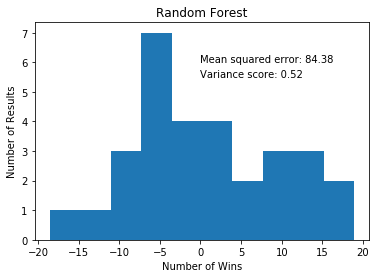

In [91]:
# Create linear regression object
regr = ensemble.RandomForestRegressor(n_estimators = 1600,
 min_samples_split= 10,
 min_samples_leaf = 1,
 max_features= 'sqrt',
 max_depth= 20,
 bootstrap = True)

# Train the model using the training sets
regr.fit(wins_X_train, wins_y_train)
importances = regr.feature_importances_

# Make predictions using the testing set
wins_y_pred = regr.predict(wins_X_test)


RF = wins_y_test - wins_y_pred

print('Upper and Lower Bounds for 90% Density:  \n', np.percentile(RF, [5,95]))
print('Feature Importance:  \n', importances)
plt.hist(RF)
plt.text(0, 6, "Mean squared error: %.2f"
      % mean_squared_error(wins_y_test, wins_y_pred))
plt.text(0, 5.5, 'Variance score: %.2f' % r2_score(wins_y_test, wins_y_pred))
plt.xlabel("Number of Wins")
plt.ylabel("Number of Results")
plt.title('Random Forest')

Now that I have looked at a number of models and determined that the Random Forest has been the most accurate, I can take a closer look at how that model is functioning.  Below is an exploration of the feature importance placed by the Random Forest model on each variable.

  Attribute  Coefficient  Coef_Abs_Val
3     BPM_A     0.319988      0.319988
0      WORP     0.232198      0.232198
1      VORP     0.227775      0.227775
5    Prev_W     0.107617      0.107617
4       Age     0.064825      0.064825
2       PER     0.047596      0.047596


Text(0,0.5,'Attribute')

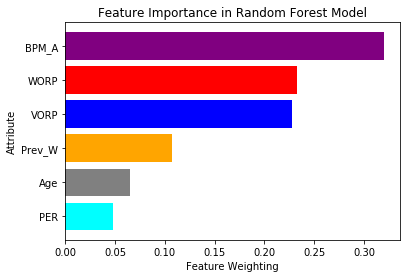

In [92]:
dic ={'Attribute': ['WORP', 'VORP' , 'PER' , 'BPM_A' , 'Age' , 'Prev_W'], 'Coefficient' : [ 0.232198,   0.22777545, 0.04759639, 0.31998789, 0.06482516, 0.10761711]}
CoefDF = pd.DataFrame(data=dic)
CoefDF['Coef_Abs_Val']= CoefDF['Coefficient'].abs()
CoefDF = CoefDF.sort_values(['Coef_Abs_Val'], ascending = False)
print (CoefDF)

plt.figure()
plt.barh(CoefDF['Attribute'], CoefDF['Coef_Abs_Val'], color = ['purple', 'red', 'blue', 'orange', 'gray', 'cyan'])
plt.gca().invert_yaxis()
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Feature Weighting')
plt.ylabel('Attribute')


In [56]:
#pickle the ammended data for later use
import pickle

hoops2.to_pickle('hoops2.pickle')

In order to satisfy intellectual curiousity, I have also examined the feature importance of the next most accurate model, the RidgeCV, model, to see if it applied similar importance to the featues.

In [74]:
rcv = linear_model.RidgeCV(alphas = (0.1, 0.3, .5, 1, 2, 5, 10))
rcv.fit(wins_X_train / np.std(wins_X_train, 0), wins_y_train)
print(rcv.coef_)

[ 2.83568841  2.87420391 -1.65203126  3.6017439   0.75569442  0.38156254]


In [77]:
rcvdic ={'Attribute': ['WORP', 'VORP' , 'PER' , 'BPM_A' , 'Age' , 'Prev_W'], 'Coefficient' : [ 2.84,   2.87, -1.65, 3.60, 0.76, 0.38]}
CoefRCV = pd.DataFrame(data=rcvdic)
CoefRCV['Coef_Abs_Val']= CoefRCV['Coefficient'].abs()
CoefRCV = CoefRCV.sort_values(['Coef_Abs_Val'], ascending = False)
print (CoefRCV)

  Attribute  Coefficient  Coef_Abs_Val
3     BPM_A         3.60          3.60
1      VORP         2.87          2.87
0      WORP         2.84          2.84
2       PER        -1.65          1.65
4       Age         0.76          0.76
5    Prev_W         0.38          0.38


Text(0,0.5,'Attribute')

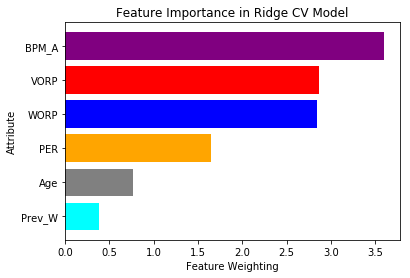

In [79]:
plt.figure()
plt.barh(CoefRCV['Attribute'], CoefRCV['Coef_Abs_Val'], color = ['purple', 'red', 'blue', 'orange', 'gray', 'cyan'])
plt.gca().invert_yaxis()
plt.title('Feature Importance in Ridge CV Model')
plt.xlabel('Feature Weighting')
plt.ylabel('Attribute')

Interestingly, the Ridge CV model applied similar valuations to each of the first three features, also making Box Plus Minus the most important.  It however found the least value in the the previous season win total, and apllied more value (albeit negative) to the PER statistic.

After exploring a number of models it appears that the model that predicts Wins (as opposed to change in wins) performs significantly better.  Also, the Random Forest model produced the greatest r-squared score and lowest mean squared error of the models applied to the overall wins data.  It also appears that while a team's previous season win total is definitely a factor in predictiong the next season wins, factors like WORP, VORP, and BPM_A may be even more important.  PER, while it did not have a positive correlation to wins, surprisingly, still helped to provide a better fitting model.  Overall, it appears that a reasonable amount of importance can be applied to these statistics when trying to build a winning NBA team.